In [1]:
# Import Library dan data yang dibutuhkan
import pandas as pd
data = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv")
print(data.head())
print("\nBentuk Data :",data.shape)
print("Jumlah ID yang unik :",data["customerID"].nunique())

   UpdatedAt   customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     202006  45759018157  Female              0     Yes         No     1.0   
1     202006  45557574145    Male              0      No         No    34.0   
2     202006  45366876421    Male              0      No         No     2.0   
3     202006  45779536532    Male              0      No         No    45.0   
4     202006  45923787906  Female              0      No         No     2.0   

  PhoneService     MultipleLines InternetService  ... DeviceProtection  \
0           No  No phone service             DSL  ...               No   
1          Yes                No             DSL  ...              Yes   
2          Yes                No             DSL  ...               No   
3           No  No phone service             DSL  ...              Yes   
4          Yes                No     Fiber optic  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0 

In [2]:
# Memfilter data berdasarkan aturan customerID
data['valid_id'] = data["customerID"].str.match(r'^45[0-9]{9,10}')
data = (data[data['valid_id']==True]).drop('valid_id',axis=1)
print("Jumlah data yang terfilter :",data['customerID'].count())

Jumlah data yang terfilter : 7006


In [3]:
# Membuang data yang terduplikasi pada kolom customerID
data.drop_duplicates(inplace=True)
data = data.sort_values(by='UpdatedAt',ascending=False).drop_duplicates(['customerID'])
print("Jumlah data yang terfilter :",data['customerID'].count())

Jumlah data yang terfilter : 6993


In [4]:
# Membuang data Missing Values pada kolom Churn
print("Jumlah Missing Values pada kolom Churn :",data['Churn'].isna().sum())
data.dropna(subset=["Churn"],inplace=True)
print("Bentuk dimensi data setelah dilakukan penghapusan missing values :",data.shape)

Jumlah Missing Values pada kolom Churn : 43
Bentuk dimensi data setelah dilakukan penghapusan missing values : (6950, 22)


In [5]:
# Mengimpute data Missing Values pada kolom lain
print("Jumlah Missing Values pada setiap kolom :")
print(data.isnull().sum().sort_values(ascending=False))
data['tenure'].fillna(11,inplace=True)
for col in ['MonthlyCharges','TotalCharges'] :
    median = data[col].median()
    data[col].fillna(median,inplace=True)
print("\nJumlah Missing Values pada setiap kolom setelah imputasi :")
print(data.isnull().sum().sort_values(ascending=False))

Jumlah Missing Values pada setiap kolom :
tenure              99
MonthlyCharges      26
TotalCharges        15
UpdatedAt            0
DeviceProtection     0
PaymentMethod        0
PaperlessBilling     0
Contract             0
StreamingMovies      0
StreamingTV          0
TechSupport          0
OnlineBackup         0
customerID           0
OnlineSecurity       0
InternetService      0
MultipleLines        0
PhoneService         0
Dependents           0
Partner              0
SeniorCitizen        0
gender               0
Churn                0
dtype: int64

Jumlah Missing Values pada setiap kolom setelah imputasi :
UpdatedAt           0
customerID          0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
DeviceProtection    0
OnlineBackup        0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Depen

Distribusi data pada kolom tenure, MonthlyCharges, TotalCharges dengan outliers :
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.477266       65.783741   2305.083460
std      25.188910       50.457871   2578.651143
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     500.000000     2311.000000  80000.000000


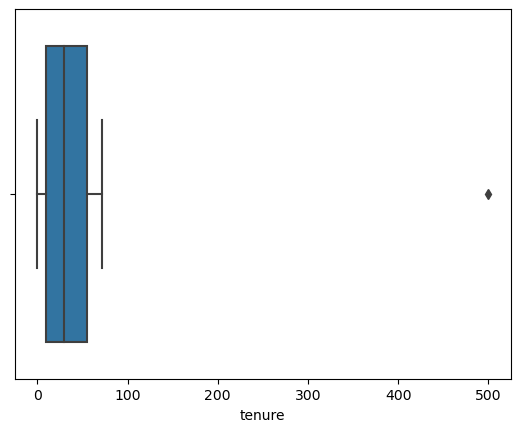

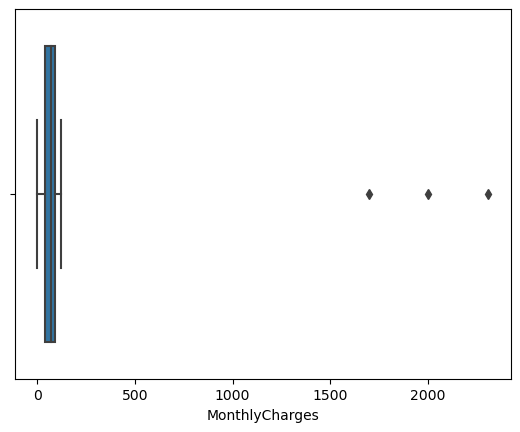

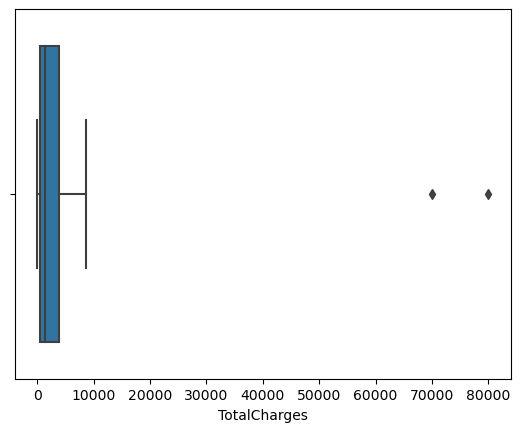

In [6]:
# Memvisualisasikan Data Outlier
import matplotlib.pyplot as plt
import seaborn as sns

print("Distribusi data pada kolom tenure, MonthlyCharges, TotalCharges dengan outliers :")
print(data[['tenure','MonthlyCharges','TotalCharges']].describe())

plt.figure()
sns.boxplot(x=data['tenure'])
plt.show()
plt.figure()
sns.boxplot(x=data['MonthlyCharges'])
plt.show()
plt.figure()
sns.boxplot(x=data['TotalCharges'])
plt.show()

In [7]:
# Mengganti nilai-nilai Outlier berdasarkan batas nilai menggunakan IQR
Q1 = data[['tenure','MonthlyCharges','TotalCharges']].quantile(0.25)
Q3 = data[['tenure','MonthlyCharges','TotalCharges']].quantile(0.75)
IQR = Q3-Q1

maksimum = Q3 + (1.5*IQR)
print("Nilai batas maksimum dari masing-masing kolom :")
print(maksimum)

minimum = Q1 - (1.5*IQR)
print("\nNilai batas minimum dari masing-masing kolom :")
print(minimum)

more_than = (data>maksimum)
lower_than = (data<minimum)

data = data.mask(more_than,maksimum,axis=1)
data = data.mask(lower_than,minimum,axis=1)

print("\nDistribusi data yang baru setelah Outliers ditangani:")
data[['tenure','MonthlyCharges','TotalCharges']].describe()

Nilai batas maksimum dari masing-masing kolom :
tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64

Nilai batas minimum dari masing-masing kolom :
tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64

Distribusi data yang baru setelah Outliers ditangani:


C:\Users\zulfi\AppData\Local\Temp\ipykernel_21628\1907479526.py:14: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  more_than = (data>maksimum)
C:\Users\zulfi\AppData\Local\Temp\ipykernel_21628\1907479526.py:15: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower_than = (data<minimum)


,tenure,MonthlyCharges,TotalCharges
count,6950.000000,6950.000000,6950.000000
mean,32.423165,64.992201,2286.058750
std,24.581073,30.032040,2265.702553
min,0.000000,0.000000,19.000000
25%,9.000000,36.462500,406.975000
50%,29.000000,70.450000,1400.850000
75%,55.000000,89.850000,3799.837500
max,124.000000,169.931250,8889.131250


In [39]:
# Cek Nilai Unique pada setiap kolom kategori
kategorikal = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService',
 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract'
 ,'PaperlessBilling','PaymentMethod','Churn']

for col in kategorikal :
    print("\nNilai unik kolom {} sebelum distandarisasi:".format(col))
    print(data[col].value_counts())


Nilai unik kolom gender sebelum distandarisasi:
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64

Nilai unik kolom SeniorCitizen sebelum distandarisasi:
0    5822
1    1128
Name: SeniorCitizen, dtype: int64

Nilai unik kolom Partner sebelum distandarisasi:
No     3591
Yes    3359
Name: Partner, dtype: int64

Nilai unik kolom Dependents sebelum distandarisasi:
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64

Nilai unik kolom PhoneService sebelum distandarisasi:
Yes    6281
No      669
Name: PhoneService, dtype: int64

Nilai unik kolom MultipleLines sebelum distandarisasi:
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64

Nilai unik kolom InternetService sebelum distandarisasi:
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64

Nilai unik kolom OnlineSecurity sebelum distandarisasi:
No                     3454
Yes 

In [41]:
# Mengubah nilai unik yang salah pada kolom kategori
data.replace(['Wanita','Laki-Laki','Iya',"Churn"],['Female','Male','Yes',"Yes"],inplace=True)
for i in list(['gender','Dependents','Churn']) :
    print("\nNilai Unik Kolom {} setelah Distandarisasi :".format(i))
    print(data[i].value_counts())


Nilai Unik Kolom gender setelah Distandarisasi :
Male      3505
Female    3445
Name: gender, dtype: int64

Nilai Unik Kolom Dependents setelah Distandarisasi :
No     4870
Yes    2080
Name: Dependents, dtype: int64

Nilai Unik Kolom Churn setelah Distandarisasi :
No     5114
Yes    1836
Name: Churn, dtype: int64


Sumber Belajar : www.dqlab.id